# Run libraries

In [1]:
library(readr, quietly = TRUE, warn.conflicts = FALSE)
library(CIARA, quietly = TRUE, warn.conflicts = FALSE)
library(Seurat, quietly = TRUE, warn.conflicts = FALSE)
library(ggplot2, quietly = TRUE, warn.conflicts = FALSE)
library(destiny, quietly = TRUE, warn.conflicts = FALSE)
library(parallel, quietly = TRUE, warn.conflicts = FALSE)
library(tidyverse, quietly = TRUE, warn.conflicts = FALSE)
library(ggbeeswarm, quietly = TRUE, warn.conflicts = FALSE)
library(ggthemes, quietly = TRUE, warn.conflicts = FALSE)
library(SingleCellExperiment, quietly = TRUE, warn.conflicts = FALSE)
library(clustree, quietly = TRUE, warn.conflicts = FALSE)
library(Biobase, quietly = TRUE, warn.conflicts = FALSE)
library(cowplot, quietly = TRUE, warn.conflicts = FALSE)

Attaching SeuratObject

‘SeuratObject’ was built under R 4.3.0 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ stringr   1.5.0
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from 

# Read data

In [3]:
vedo=read_rds('Data by Ding Yang/cluster_9_data.rds')
load( file='CIARA_datasets/frog/umap_coordinate_frog.Rda')
umap_coordinate = umap_coordinate_frog


In [4]:
vedo

An object of class Seurat 
48668 features across 134 samples within 3 assays 
Active assay: SCT (15489 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, umap, tsne

# original

Warning message in DiffusionMap(t(as.matrix(deng)), verbose = TRUE):
“You have 2000 genes. Consider passing e.g. n_pcs = 50 to speed up computation.”


finding knns......done. Time: 0.10s
Calculating transition probabilities...

Warning message:
“'as(<dsCMatrix>, "dsTMatrix")' is deprecated.
Use 'as(., "TsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").”


...done. Time: 0.02s

performing eigen decomposition......done. Time: 0.00s


[1]  68  14 102

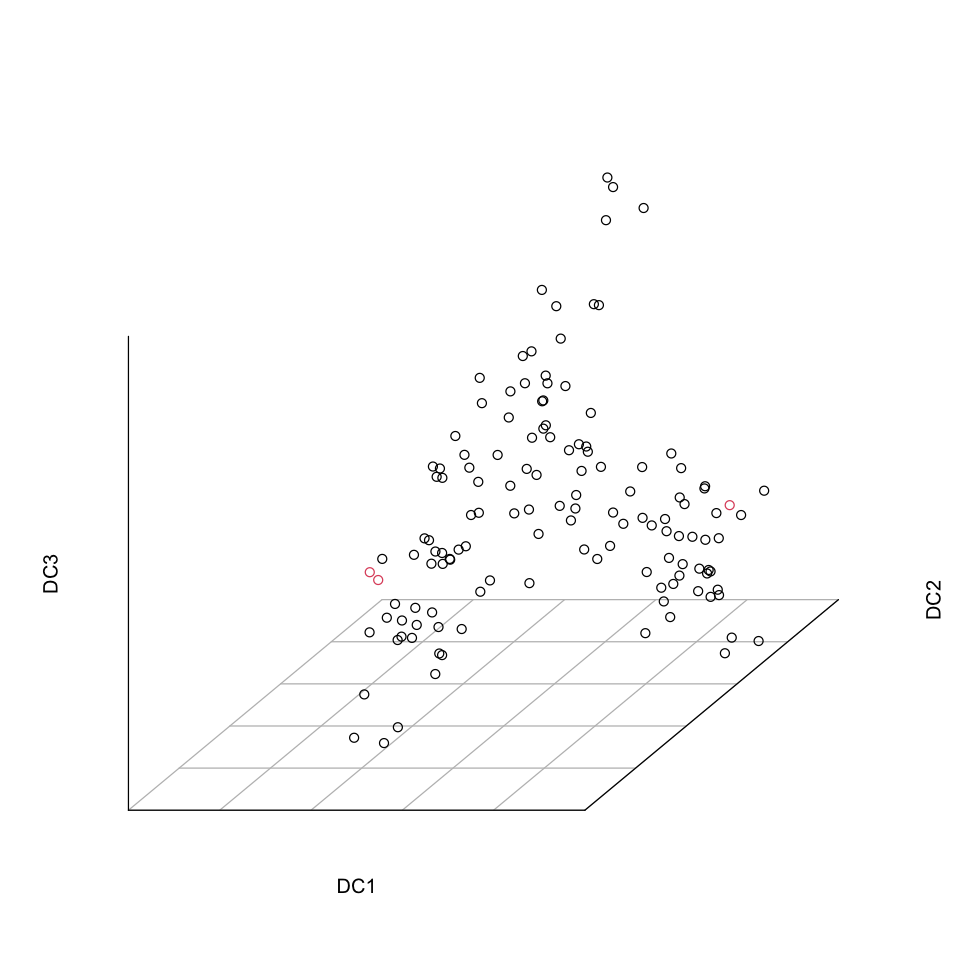

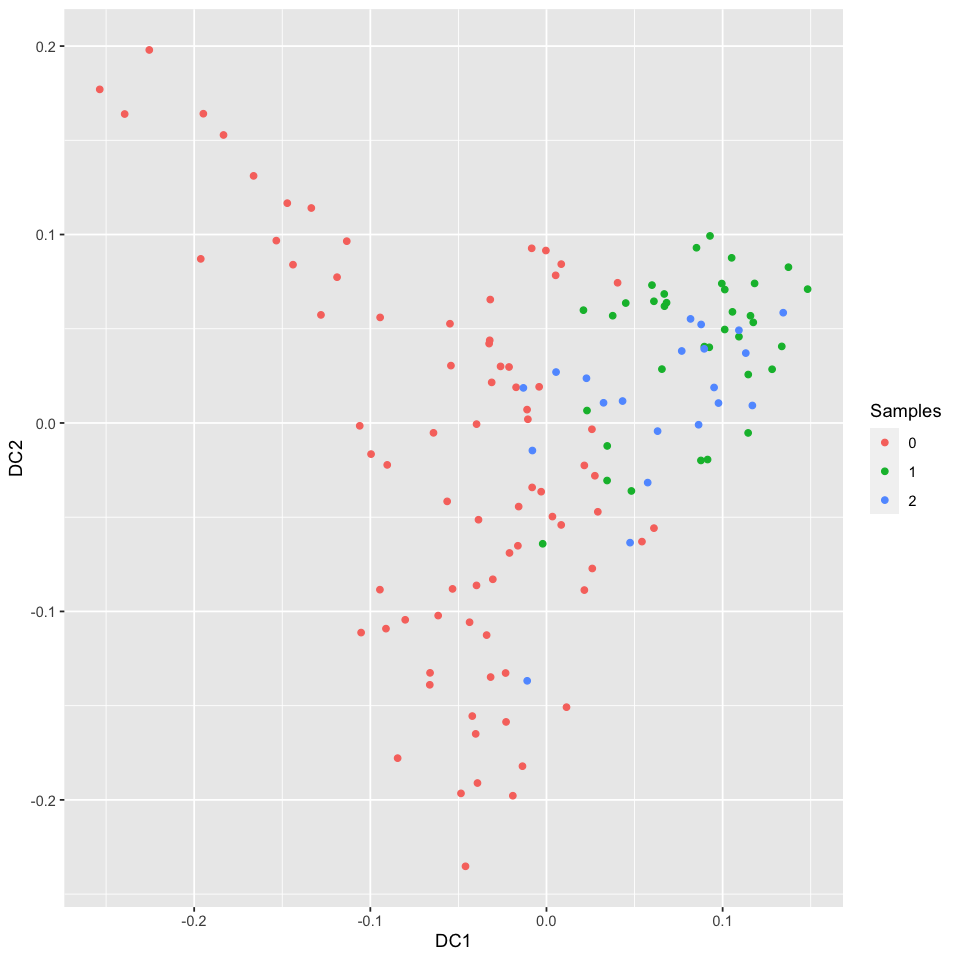

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
deng <- vedo@assays$integrated@data  # access log-transformed counts matrix
# Make a diffusion map.
dm <- DiffusionMap(t(as.matrix(deng)), verbose = TRUE)
find_tips(dm)
is_tip <- l_which(find_tips(dm), len = nrow(dataset(dm)))

plot(dm, col = factor(is_tip))

dpt <- DPT(dm, tips = 68) #tips could be 14, 68, 102
df <- data.frame(DC1 = eigenvectors(dm)[, 1],
                  DC2 = eigenvectors(dm)[, 2],
                  DC3 = eigenvectors(dm)[, 3],
                  DC4 = eigenvectors(dm)[, 4],
                  dptval = dpt$dpt,
                  Samples = vedo@active.ident,
                 experment = vedo@meta.data$exp,
                  Nt= vedo@meta.data$isnt,
                CIARA = vedo@meta.data$CIARA_cluster)


ggplot(df) + geom_point(aes(x = DC1, y = DC2, color = Samples))


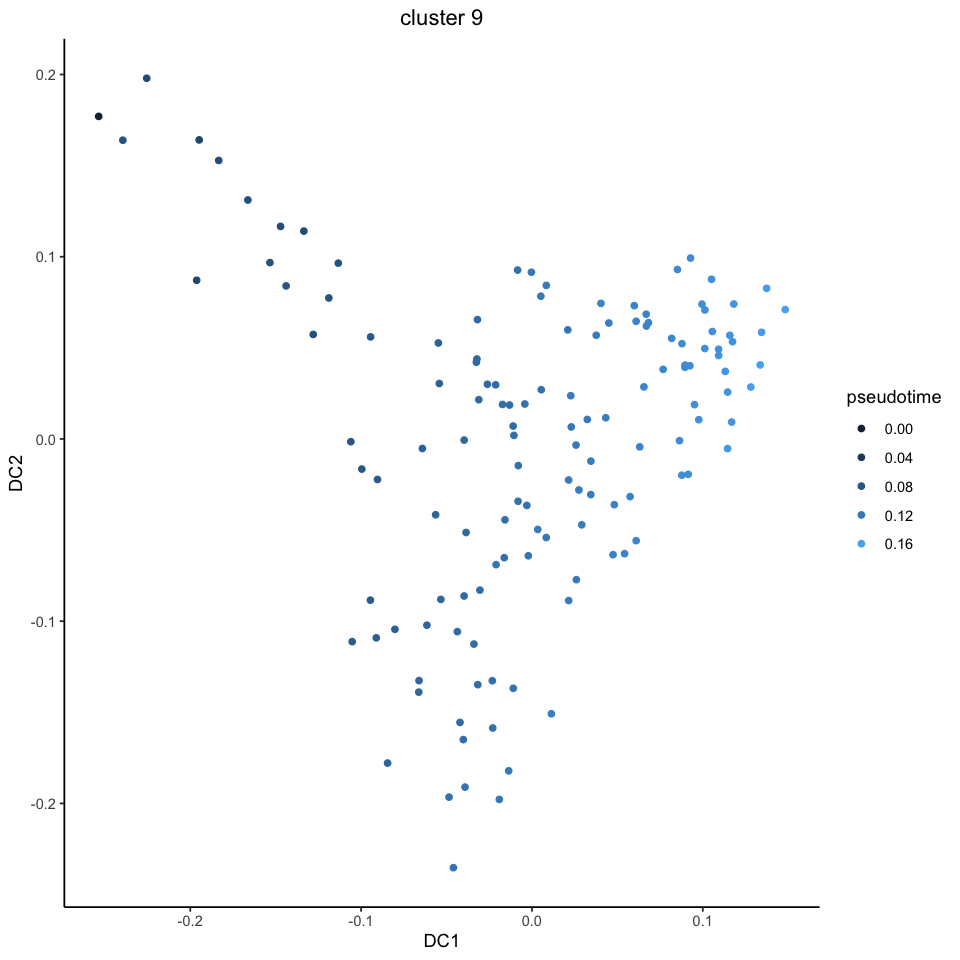

In [6]:
ggplot(df) + geom_point(aes(x = DC1, y = DC2, color = dptval))+  theme_classic() + ggplot2::ggtitle("cluster 9")+
  theme(plot.title = element_text(hjust = 0.5))+ 
  guides(color = guide_legend(title = "pseudotime")) 

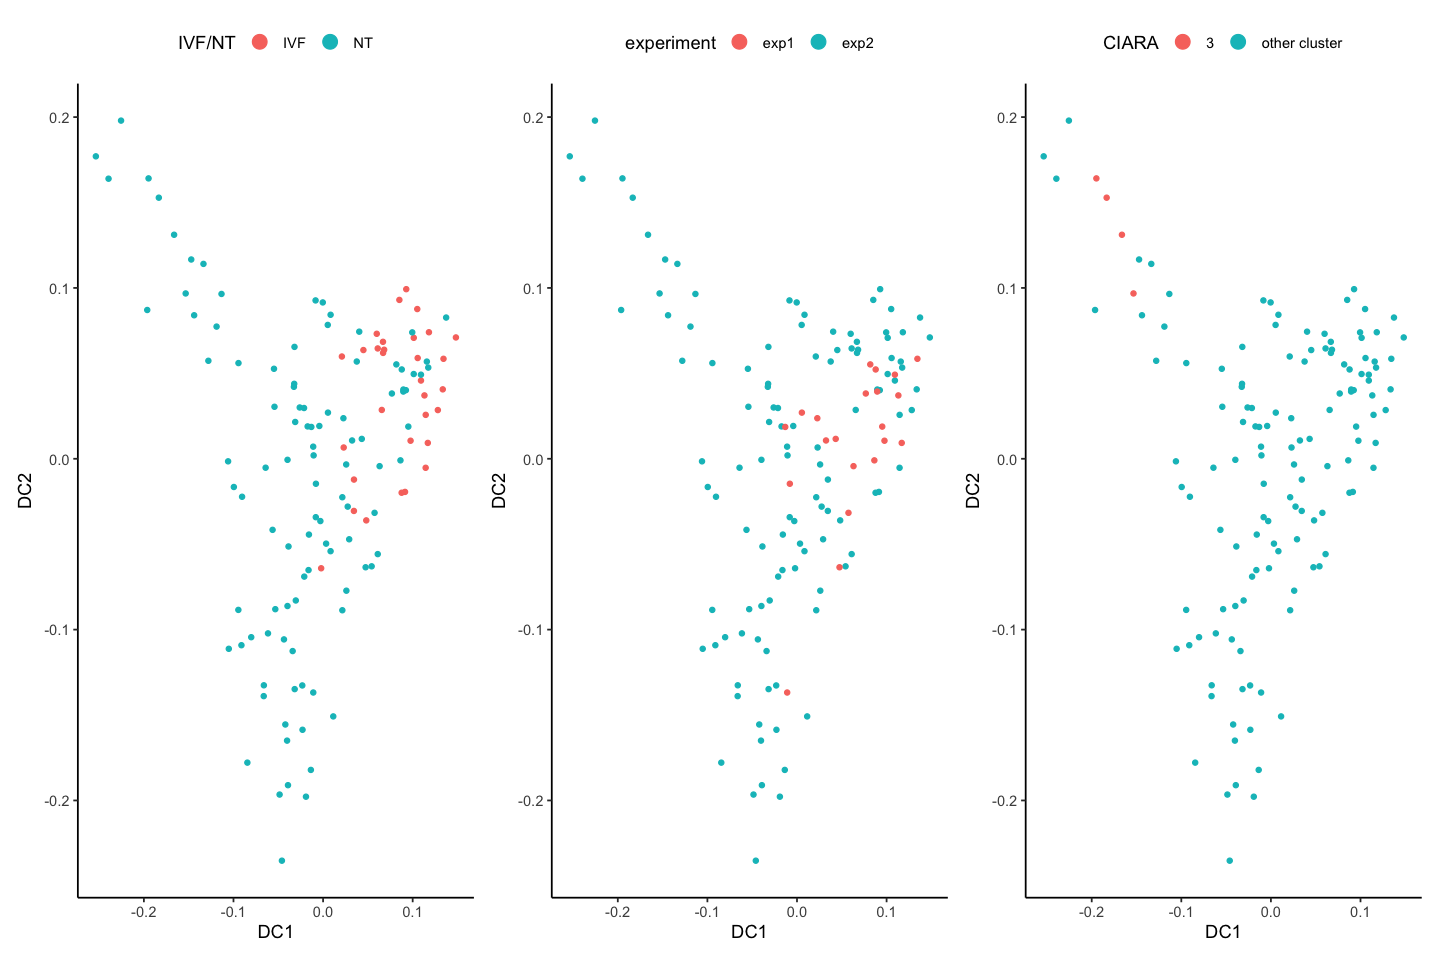

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
p1<-ggplot(df) + geom_point(aes(x = DC1, y = DC2, color = Nt),size =1.15) +
  theme_classic() + guides(colour = guide_legend(override.aes = list(size=3.8)))  + labs(col = "IVF/NT")+ theme(legend.position = "top")

p2<-ggplot(df) + geom_point(aes(x = DC1, y = DC2, color = experment), size =1.15) +
  theme_classic() + guides(colour = guide_legend(override.aes = list(size=3.8)))  + labs(col = "experiment") + theme(legend.position = "top")
p3<-ggplot(df) + geom_point(aes(x = DC1, y = DC2, color = CIARA),size =1.15) +
  theme_classic() + guides(colour = guide_legend(override.aes = list(size=3.8)))  + labs(col = "CIARA") + theme(legend.position = "top")

plot3 <- p1 + p2 + p3

plot3

In [8]:
sort(df$dptval)

[1] 0.00000000 0.05711015 0.06116657 0.06606659 0.06687169 0.06775697
  [7] 0.06886868 0.07211143 0.07352074 0.07631398 0.07635078 0.07756108
 [13] 0.07774851 0.08000839 0.08201683 0.08235098 0.08483809 0.08686817
 [19] 0.08899467 0.08946836 0.09199223 0.09447098 0.09453901 0.09627112
 [25] 0.09680914 0.09846837 0.09897186 0.09981108 0.10089428 0.10143574
 [31] 0.10161636 0.10221181 0.10387976 0.10485808 0.10495982 0.10499265
 [37] 0.10515688 0.10551745 0.10567925 0.10570338 0.10645981 0.10820612
 [43] 0.10858871 0.10878641 0.10944797 0.10967527 0.11012865 0.11025836
 [49] 0.11029799 0.11053258 0.11172066 0.11175708 0.11212825 0.11225991
 [55] 0.11284117 0.11342345 0.11378074 0.11397639 0.11410995 0.11448164
 [61] 0.11487564 0.11493772 0.11497721 0.11640737 0.11660874 0.11774162
 [67] 0.11802791 0.11863357 0.11931319 0.11961047 0.12006219 0.12142229
 [73] 0.12198851 0.12215833 0.12247080 0.12300571 0.12324319 0.12390295
 [79] 0.12398971 0.12405742 0.12416494 0.12459168 0.12462724 0.12496146
 [85] 0.12514698 0.12535094 0.12584139 0.12612231 0.12640186 0.13064433
 [91] 0.13073821 0.13151630 0.13159522 0.13260047 0.13285435 0.13298600
 [97] 0.13319458 0.13321245 0.13328991 0.13373909 0.13442071 0.13571205
[103] 0.13670870 0.13736839 0.13888239 0.13968116 0.14014890 0.14027713
[109] 0.14079465 0.14104738 0.14116656 0.14234846 0.14262755 0.14320192
[115] 0.14386824 0.14399316 0.14513386 0.14536472 0.14536593 0.14598595
[121] 0.14695721 0.14854586 0.14865284 0.14902736 0.14934852 0.14953487
[127] 0.15034849 0.15169621 0.15224404 0.15659641 0.15668066 0.15939024
[133] 0.16205844 0.16206545

In [9]:
for (a in 1:nrow(df)) {
  if (df$dptval[a] < 0.096){
    df$dptval.factor[a] = "dpt < 0.096"
  }
  if (df$dptval[a] > 0.096 & df$dptval[a] < 0.112){
    df$dptval.factor[a] = "0.096 < dpt < 0.112"
  }
  if (df$dptval[a] > 0.112 & df$dptval[a] < 0.124 ){
    df$dptval.factor[a] = "0.112 < dpt < 0.124"
  }
  if (df$dptval[a] > 0.124 & df$dptval[a] < 0.142){
    df$dptval.factor[a] = "0.124 < dpt < 0.142" 
  }
    if (df$dptval[a] > 0.142){
    df$dptval.factor[a] = "0.142 < dpt"
  }
}

In [10]:
df$dptval.factor <- factor(df$dptval.factor, levels = c("dpt < 0.096", "0.096 < dpt < 0.112", "0.112 < dpt < 0.124", "0.124 < dpt < 0.142", "0.142 < dpt"))

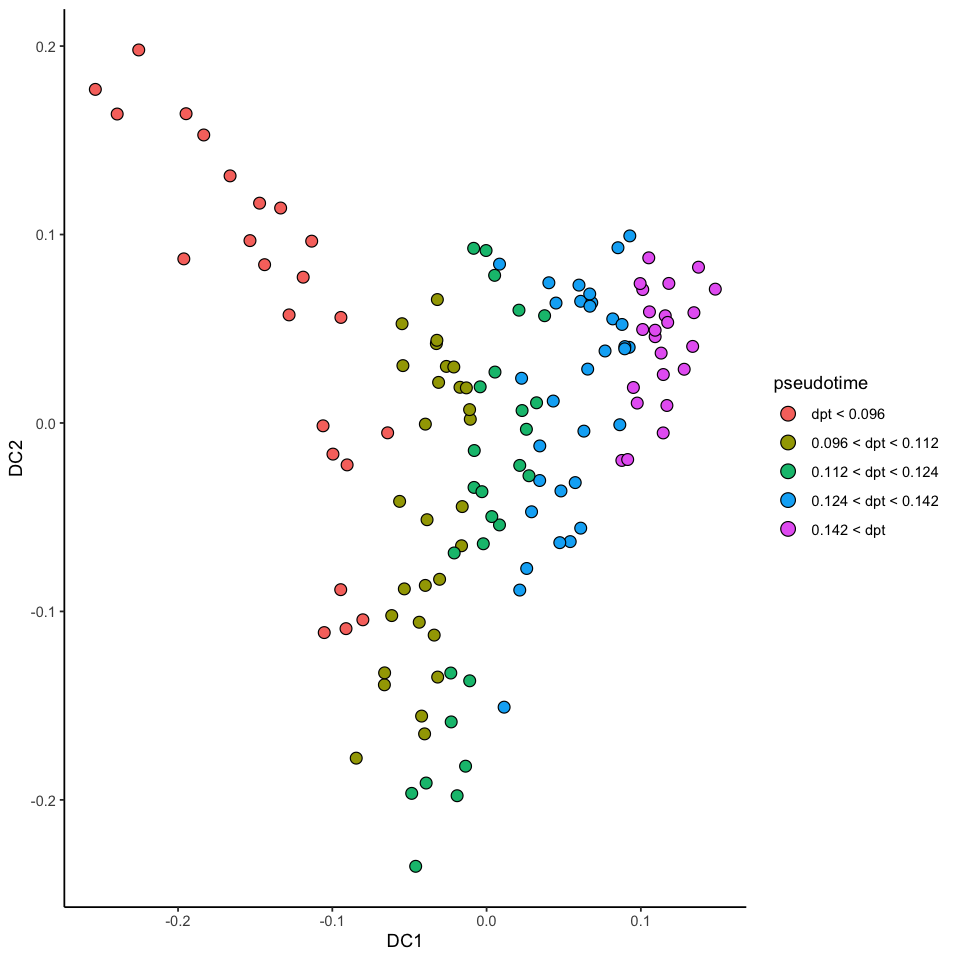

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(
    df, aes(x = DC1, y = DC2, fill = factor(dptval.factor))
  ) +
  geom_point(shape = 21, color = "black", size = 3) +
  scale_size(range = c(0.5, 4)) + 
  guides(fill = guide_legend(title = "pseudotime",override.aes = list(size=3.8))) + theme_classic()


# Select genes for gene expression vs. pseudotime

In [12]:
library(gam)
library(scran)

Loading required package: splines

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loaded gam 1.22-2


Loading required package: scuttle



In [13]:
HVGs <- as.data.frame(as.matrix(vedo@assays$SCT@counts))
HVGs_name <- vedo@assays$SCT@var.features
HVGs <- HVGs[HVGs_name,]
HVGs 

,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CAGTTCCCATACGCAT.1,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eif4a1.S,68,80,74,63,50,76,116,70,138,42,⋯,16,71,52,44,33,69,79,30,32,80
krt.S,249,231,324,259,285,221,322,433,266,477,⋯,60,149,94,248,122,298,58,92,186,95
foxi1.S,84,46,25,37,97,96,103,146,87,106,⋯,3,5,2,5,1,3,7,2,13,11
eif4a1.L,65,85,59,63,62,59,77,74,81,41,⋯,48,74,44,84,74,85,94,45,75,83
Xelaev18000774m.g,133,135,221,96,99,103,114,131,198,159,⋯,42,61,24,41,30,120,25,54,62,58
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,2,66,3,98,61,79,20,3,56,44
foxi1.L,87,83,82,58,99,78,102,193,113,143,⋯,4,11,7,14,8,7,33,5,39,10
Xelaev18038704m.g,4,31,2,4,1,2,43,2,0,3,⋯,2,5,4,2,5,2,1,6,3,1
krt12.S,47,84,104,71,69,28,107,190,20,148,⋯,4,4,10,4,10,17,4,8,9,9


In [14]:
# filte out the gene that appear in less than 10 cells
selected_genes = list()
for (a in 1:nrow(HVGs)) {
    count = 0
    for (b in 1:ncol(HVGs)){
        if (HVGs[a,b]>0){
            count = count + 1
        }
    }
    if (count > 10 ){
    selected_genes<-append(selected_genes,rownames(HVGs[a,]))
        #print(count)
    }
}

In [15]:
# generate the background data for GO analysis
length(selected_genes)
selected_genes<-unlist(selected_genes)
write.table(selected_genes, file = "Data by Ding Yang/background_for_GO.txt", sep = "\t",
            row.names = FALSE, quote = FALSE)

[1] 2601

In [16]:
HVGs<- HVGs[selected_genes,]

HVGs

,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CAGTTCCCATACGCAT.1,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eif4a1.S,68,80,74,63,50,76,116,70,138,42,⋯,16,71,52,44,33,69,79,30,32,80
krt.S,249,231,324,259,285,221,322,433,266,477,⋯,60,149,94,248,122,298,58,92,186,95
foxi1.S,84,46,25,37,97,96,103,146,87,106,⋯,3,5,2,5,1,3,7,2,13,11
eif4a1.L,65,85,59,63,62,59,77,74,81,41,⋯,48,74,44,84,74,85,94,45,75,83
Xelaev18000774m.g,133,135,221,96,99,103,114,131,198,159,⋯,42,61,24,41,30,120,25,54,62,58
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,2,66,3,98,61,79,20,3,56,44
foxi1.L,87,83,82,58,99,78,102,193,113,143,⋯,4,11,7,14,8,7,33,5,39,10
Xelaev18038704m.g,4,31,2,4,1,2,43,2,0,3,⋯,2,5,4,2,5,2,1,6,3,1
krt12.S,47,84,104,71,69,28,107,190,20,148,⋯,4,4,10,4,10,17,4,8,9,9


In [17]:
# check the name of cells are the same
for (a in 1:ncol(HVGs)) {
    if (colnames(HVGs)[a] != row.names(df)[a]){
        print(a)
    }
}

In [18]:
sce<-SingleCellExperiment(assays = list(counts = as.matrix(HVGs)))
sce$Pseudotime <- df$dptval
sce

Y <- counts(sce)
t <- sce$Pseudotime

#Run GAM with LOESS function for all the genes
gam.res <- apply(Y, 1, function(z){
    d <- data.frame(z=z, t=t)
    tmp <- gam(z ~ lo(t), data=d)
    p <- summary(tmp)[4][[1]][1,5]  #p-value
    f<-fitted(tmp)
    c(p,f)
})


class: SingleCellExperiment 
dim: 2601 134 
metadata(0):
assays(1): counts
rownames(2601): eif4a1.S krt.S ... zfp36l1.S slc25a28.S
rowData names(0):
colnames(134): AATAGAGGTCAGGAGT.1 AGAGAATGTCTCGCGA.1 ...
  TGCGGGTTCATGGATC.1 TTACGTTCATGGCTGC.1
colData names(1): Pseudotime
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [19]:
#Build the table of the genes p-values
genes.table<-data.frame(genes.names=rownames(HVGs))
genes.table$pvals<-gam.res[1,]
genes.table$FDR<-p.adjust(genes.table$pvals, method="fdr") #Adjust p-values
genes.table<-genes.table[order(genes.table$FDR),] #Order the genes according to the FDR
genes.table$genes.names <- as.character(genes.table$genes.names)
results.gam.tot<-genes.table[genes.table$FDR < 0.01,][c('genes.names','FDR')] #Filter the significant genes

#Save the matrix of fitted values
gam.fitted<-gam.res[-1,]

print(paste("We have"
           ,sum(genes.table$FDR < 0.01)
           ,"significant genes"))

[1] "We have 1206 significant genes"


# Hierarchical clustering 

In [20]:
#Robustness analysis: change the number X of the high_varX_df to compute the robustness curve for a cluster

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust






In [21]:
DE_genes_df <- HVGs[results.gam.tot$genes.names,]


data<-t(as.matrix(DE_genes_df))

# nr of random samples
nrRepeats = 50
# percent of cells to keep
percent = 70
# nr of cells left
sampleSize <- round(length(rownames(data))*percent/100)

myRandSample <- function(indexVector){
        idxMatrix <- matrix(rep(NA, sampleSize*nrRepeats)
                            ,nrow = nrRepeats)
        for (i in 1:nrow(idxMatrix)){
                mySample <- sample(indexVector
                                   ,size = sampleSize)
                idxMatrix[i,] <- mySample
        }
        idxMatrix
}

In [22]:
cellidx <- rownames(data)
RandIdxMatrix <- myRandSample(cellidx)
length(cellidx)
length(RandIdxMatrix [1,])

[1] 134

[1] 94

### Agglomerative hierarchical clustering requires three important points to be addressed during the data analysis process (James et al., 2021).
###1.Choosing the distance metric

###2.Choosing the linkage measure

In [23]:
# indices of all the cells
cellidx <- rownames(data)
RandIdxMatrix <- myRandSample(cellidx)

# function to calculate clusters
calculateClusters <- function(geneIndices,deepSplit){
    cor.mat<-cor(data[geneIndices,],method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50, method="hybrid", deepSplit =deepSplit)
    
    clust
}

VarInfoVector <- matrix(rep(NA, nrRepeats * 5),ncol = 5)
colnames(VarInfoVector) <- c(0,1,2,3,4)

for(j in 0:4){
    tot.clust <- calculateClusters(cellidx,j)
    for (i in 1:nrow(RandIdxMatrix)){
        # take indices of HVGs from the RandIdxMatrix of the i-th iteration
        indices <- RandIdxMatrix[i,]
        # calculate the cluster statistics with these indices and deepSplit == j
        subsample.clust <- calculateClusters(indices,j)
        if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
        #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
        VarInfoVector[i,j+1] <- vi.dist(tot.clust,subsample.clust)
    }
}

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.787  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.786  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.79  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.787  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.788  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.79  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.792  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0

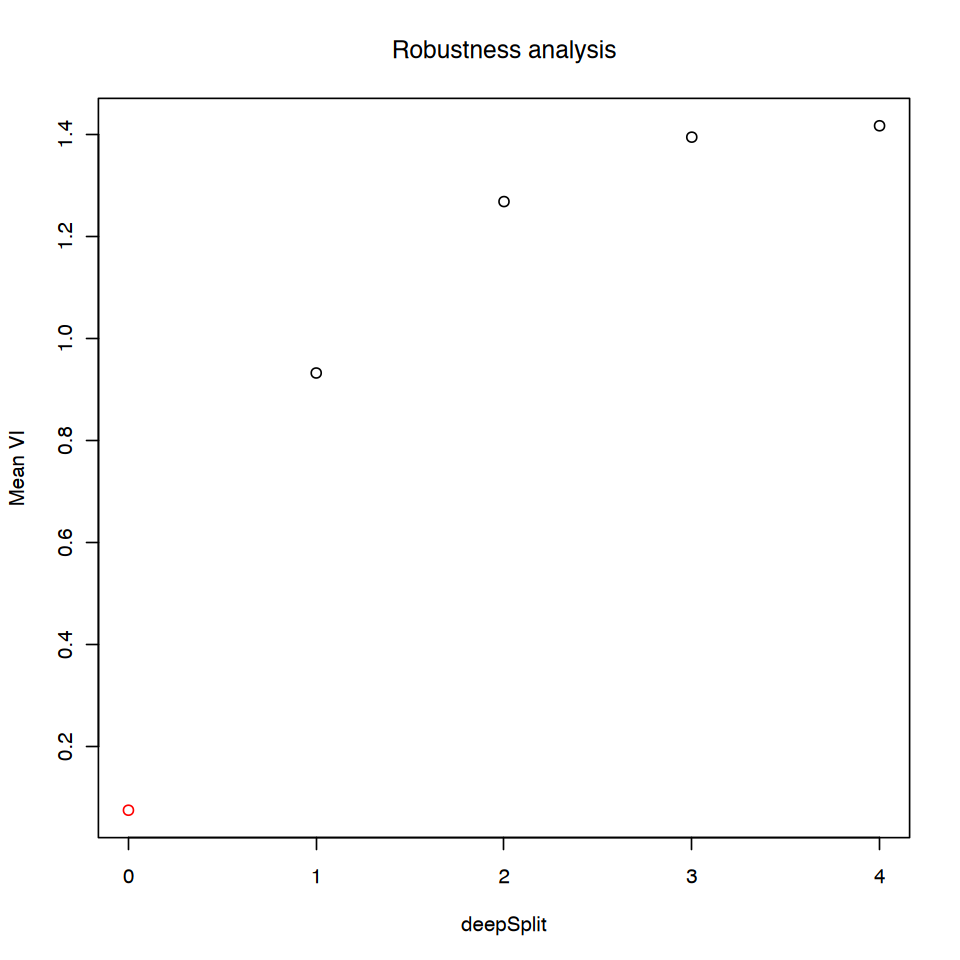

In [24]:
plot(c(0,1,2,3,4),c(mean(VarInfoVector[,1]), mean(VarInfoVector[,2]), mean(VarInfoVector[,3]), mean(VarInfoVector[,4]),
                   mean(VarInfoVector[,5])), col = c('red', 'black', 'black', 'black', 'black'), xlab="deepSplit", ylab="Mean VI") 
title(main = "Robustness analysis")

In [25]:
library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

finalClus <- function(df,deepSplit){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50,
                         method="hybrid", deepSplit =deepSplit)
    clust
}  

clust<-finalClus(data,0)
length(clust)

 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.


[1] 1206

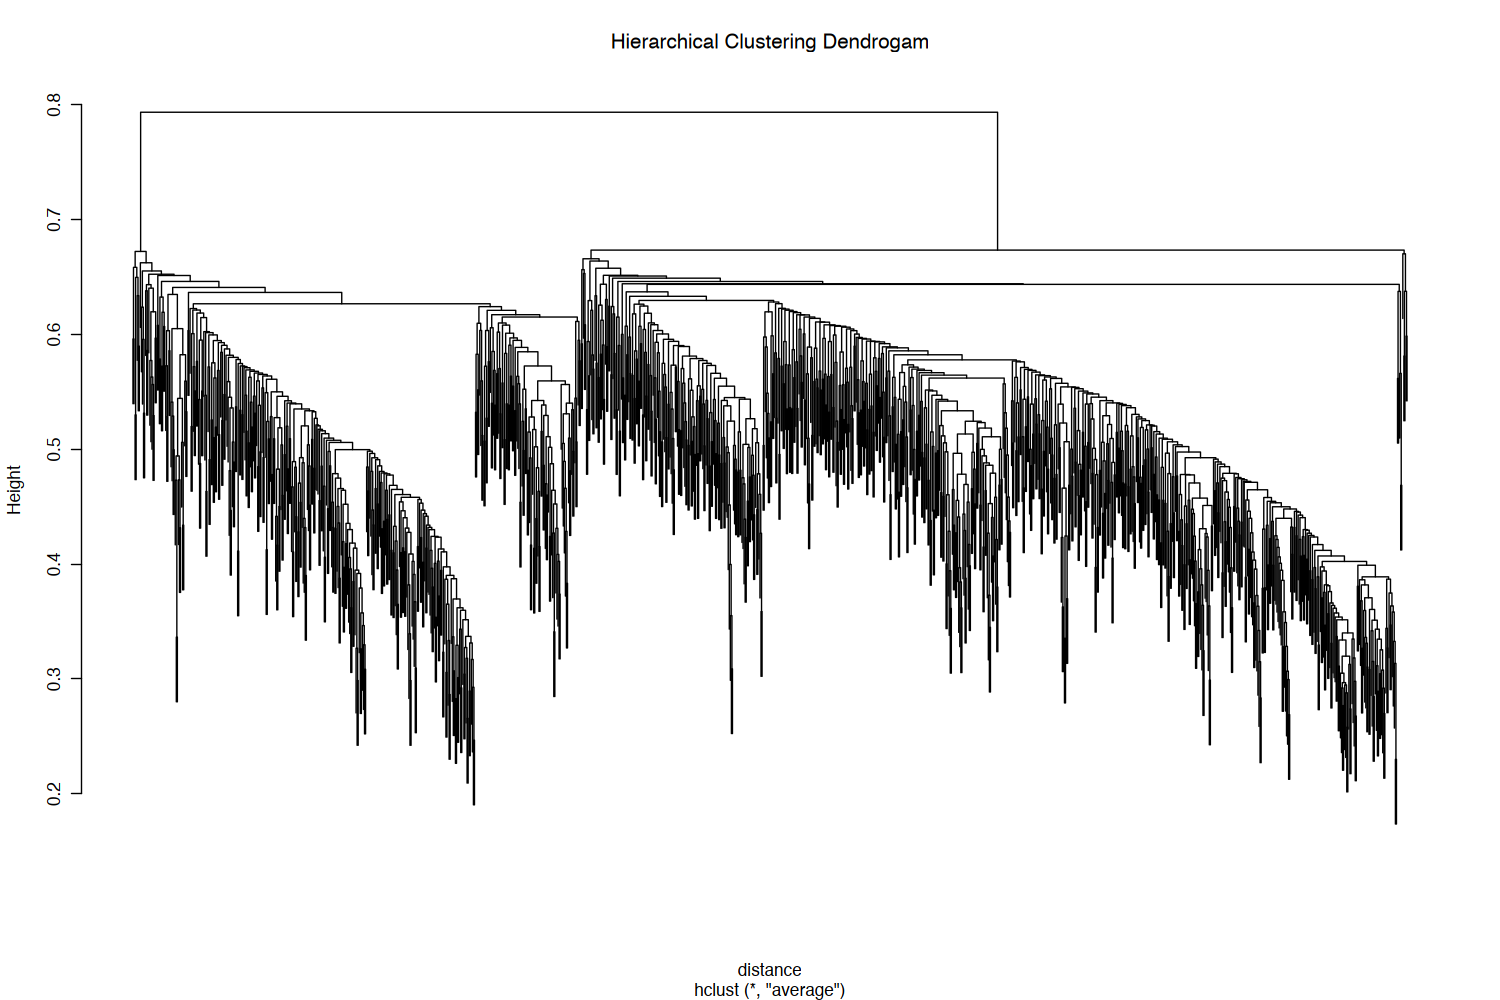

In [26]:

plotfinalClus <- function(df){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")

    plot(test.clust, xlab = "distance", main =  "Hierarchical Clustering Dendrogam", cex = 0.3)
}
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 100)
plotfinalClus(data)



In [28]:
## see the boostrapping of two cluster
library(fpc)
print_clusters <- function(labels, k) {             
  for(i in 1:k) {
    print(paste("cluster", i))
  }
}
boostrapfinalClus <- function(df){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    cboot.hclust <- clusterboot(dist.mat, distances=TRUE, clustermethod=hclustCBI, method="average", k=2)
    groups<-cboot.hclust$result$partition  
    print_clusters(groups, 2)
    print(cboot.hclust)
    print(cboot.hclust$bootmean)                                 
    print(cboot.hclust$bootbrd)     
}


boostrapfinalClus(data)



boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 
[1] "cluster 1"
[1] "cluster 2"
* Cluster stability assessment *
Cluster method:  hclust/cutree 
Full cluste

# Plot gene exprssion vs. pseudotime

In [29]:
data <- as.data.frame(data)
data<-t(data)
clust<-as.data.frame(clust)

In [30]:
data <- cbind(data,clust)
data <- as.data.frame(data)
data

,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1,clust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
etv1.S,0,2,0,3,4,2,2,4,3,3,⋯,10,4,2,3,8,12,9,10,12,2
tpbg.L,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,0,2
nox1.L,0,0,1,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
ngfr.L,0,0,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,1,1,0,2
atp2a2.S,22,19,35,20,33,29,21,42,37,59,⋯,15,12,32,29,16,16,10,14,31,1
cdx2.S,0,0,0,0,0,0,0,0,3,0,⋯,0,0,0,0,0,2,0,0,0,2
cdx4.L,1,0,0,0,0,0,0,0,1,0,⋯,1,3,0,0,0,0,1,1,0,2
itm2a.L,9,15,2,7,5,6,8,11,5,2,⋯,3,8,2,3,4,5,15,7,5,2
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,66,3,98,61,79,20,3,56,44,1


In [31]:
divide_with_max_gene <- data.frame()
for (i in 1:length(row.names(data))) {
  max_level <- max(data[i,])
  for (a in 1:(length(data)-1)) {
      divide_with_max_gene[i,a] <- data[i,a] / max_level
    }
}
divide_with_max_gene[,135]<-data[,135]
colnames(divide_with_max_gene) = colnames(data)
row.names(divide_with_max_gene) = row.names(data)
divide_with_max_gene <- t(divide_with_max_gene)

In [32]:
group_1 <- divide_with_max_gene[,divide_with_max_gene['clust',]==1]
group_1 <- group_1[1:134,]
group_1<-cbind.data.frame(group_1,as.data.frame(df$dptval))
colnames(group_1)[length(group_1)] <- 'dptval'

group_2 <- divide_with_max_gene[,divide_with_max_gene['clust',]==2]
group_2 <-group_2[1:134,]
group_2<-cbind.data.frame(group_2,as.data.frame(df$dptval))
colnames(group_2)[length(group_2)] <- 'dptval'

In [33]:
group_1_summary <- data.frame()
for (i in 1:(nrow(group_1))) {
  group_1_summary[i,1]<- mean(as.numeric(group_1[i,1:length(group_1)-1]))
  group_1_summary[i,2]<- sd(as.numeric(group_1[i,1:length(group_1)-1]))  
}
colnames(group_1_summary) = c('mean', 'sd')

group_1_summary$dptval <- df$dptval
group_1_summary

,mean,sd,dptval
,<dbl>,<dbl>,<dbl>
1,0.2636701,0.2398742,0.1315952
2,0.2739193,0.2423654,0.1306443
3,0.3798609,0.2580480,0.1315163
4,0.2784894,0.2468413,0.1332899
5,0.3896898,0.2798795,0.1495349
6,0.2933946,0.2452811,0.1438682
7,0.3031944,0.2564862,0.1264019
8,0.3415519,0.2629756,0.1620584
9,0.3812022,0.2620899,0.1411666


In [34]:
g1 <- ggplot(group_1_summary) + 
  stat_smooth(aes(x = dptval, y = mean-sd), method = "loess", se = FALSE, fill = "grey",alpha = 0.4) +
  stat_smooth(aes(x = dptval, y = mean+sd), method = "loess", se = FALSE, fill = "grey",alpha = 0.4)

# build plot object for rendering 
gg1 <- ggplot_build(g1)

# extract data for the loess lines from the 'data' slot
df2 <- data.frame(x = gg1$data[[1]]$x,
                  ymin = gg1$data[[1]]$y,
                  ymax = gg1$data[[2]]$y) 

# use the loess data to add the 'ribbon' to plot 
p1<-ggplot(group_1_summary) +
  geom_ribbon(data = df2, aes(x = x, ymin = 0, ymax = ymax),
              fill = "blue", alpha = 0.05)+
    stat_smooth(aes(x = dptval, y = mean), method = "loess", se = FALSE)+
labs(x= "Diffusion pseudotime", y = "gene expression") + ggtitle(paste("Group 1 - selected"
           ,length(group_1)-1
           ,"genes")) +   theme_classic() +
  theme(plot.title = element_text(hjust = 0.5))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [35]:
group_2_summary <- data.frame()
for (i in 1:(nrow(group_2))) {
  group_2_summary[i,1]<- mean(as.numeric(group_2[i,1:length(group_2)-1]))
  group_2_summary[i,2]<- sd(as.numeric(group_2[i,1:length(group_2)-1]))  
}
colnames(group_2_summary) = c('mean', 'sd')

group_2_summary$dptval <- df$dptval

In [36]:
g1 <- ggplot(group_2_summary) + 
  stat_smooth(aes(x = dptval, y = mean-sd), method = "loess", se = FALSE, fill = "grey",alpha = 0.4) +
  stat_smooth(aes(x = dptval, y = mean+sd), method = "loess", se = FALSE, fill = "grey",alpha = 0.4)

# build plot object for rendering 
gg1 <- ggplot_build(g1)

# extract data for the loess lines from the 'data' slot
df2 <- data.frame(x = gg1$data[[1]]$x,
                  ymin = gg1$data[[1]]$y,
                  ymax = gg1$data[[2]]$y) 

# use the loess data to add the 'ribbon' to plot 
p2<-ggplot(group_2_summary) +
  geom_ribbon(data = df2, aes(x = x, ymin = 0, ymax = ymax),
              fill = "blue", alpha = 0.05)+
    stat_smooth(aes(x = dptval, y = mean), method = "loess", se = FALSE)+
labs(x= "Diffusion pseudotime", y = "gene expression") +ggtitle(paste("Group 2 - selected"
           ,length(group_2)-1
           ,"genes")) +   theme_classic() +
  theme(plot.title = element_text(hjust = 0.5))



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


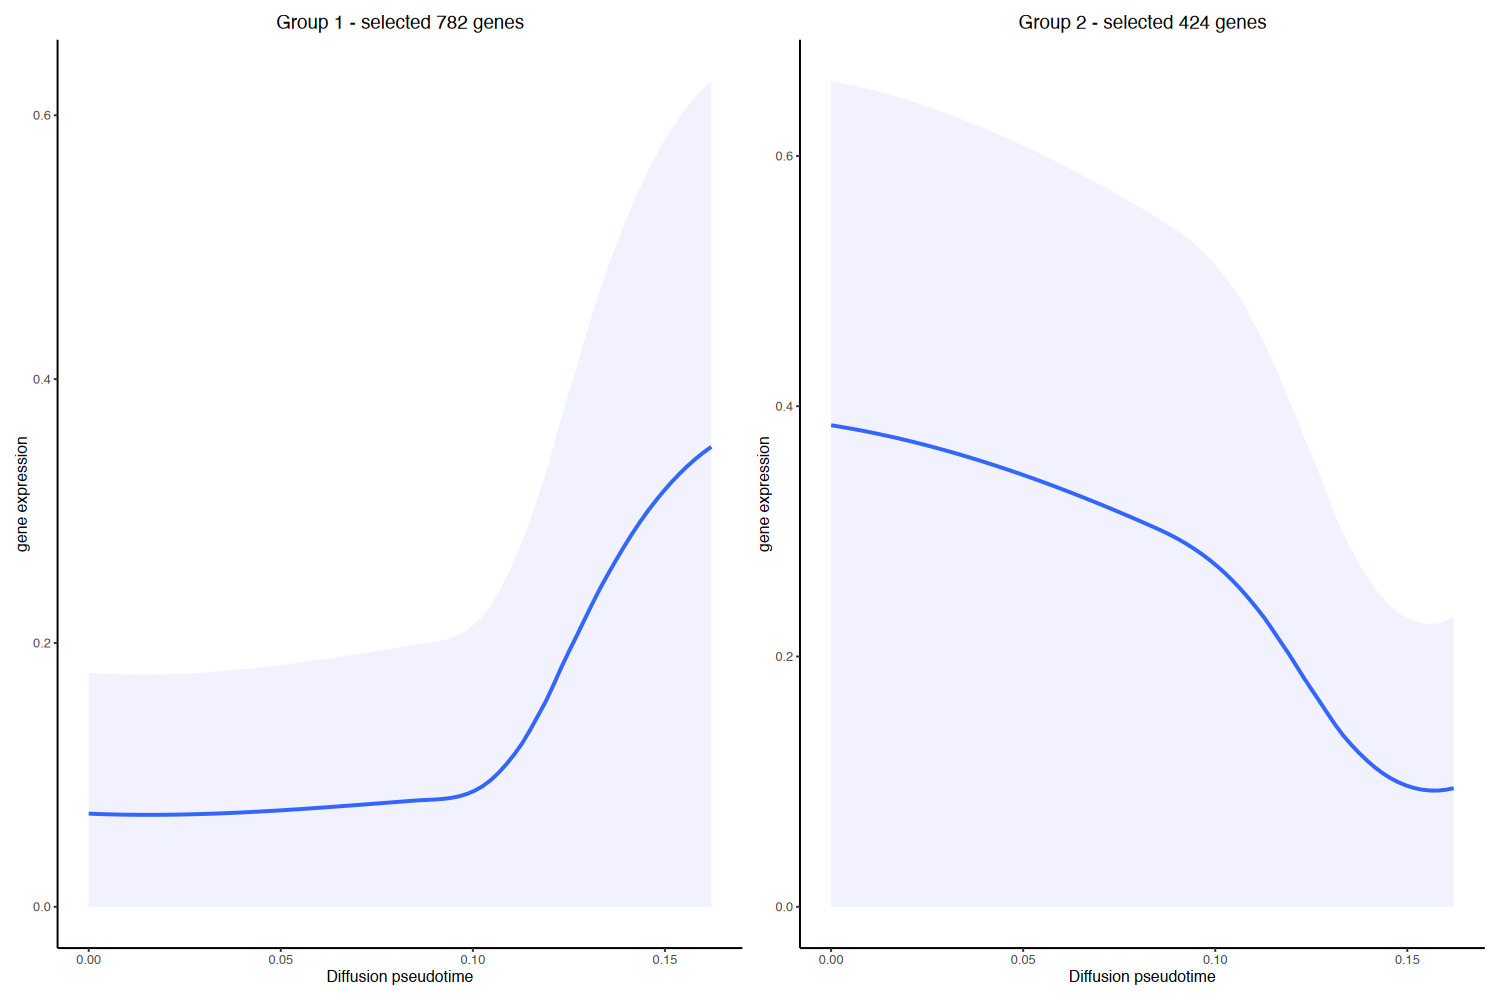

In [37]:
library(patchwork)

p3<- p1+p2
p3

# make data for GO analysis

In [38]:
group_1_genes_name <- colnames(group_1)

group_2_genes_name <- colnames(group_2)

group_1_genes_name<- group_1_genes_name[1:length(group_1_genes_name)-1]

group_2_genes_name<- group_2_genes_name[1:length(group_2_genes_name)-1]
length(group_1_genes_name)
length(group_2_genes_name)

[1] 782

[1] 424

In [39]:
write.table(group_1_genes_name, file = "Data by Ding Yang/group_1_gene.txt", sep = "\t",
            row.names = FALSE, quote = FALSE)
write.table(group_2_genes_name, file = "Data by Ding Yang/group_2_gene.txt", sep = "\t",
            row.names = FALSE, quote = FALSE)

# Hierarchical clustering - try out

In [40]:
library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

In [41]:
DE_genes_df

,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CAGTTCCCATACGCAT.1,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etv1.S,0,2,0,3,4,2,2,4,3,3,⋯,5,10,4,2,3,8,12,9,10,12
tpbg.L,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,0
nox1.L,0,0,1,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ngfr.L,0,0,0,0,0,0,1,0,0,0,⋯,0,0,1,0,0,0,0,1,1,0
atp2a2.S,22,19,35,20,33,29,21,42,37,59,⋯,15,15,12,32,29,16,16,10,14,31
cdx2.S,0,0,0,0,0,0,0,0,3,0,⋯,2,0,0,0,0,0,2,0,0,0
cdx4.L,1,0,0,0,0,0,0,0,1,0,⋯,1,1,3,0,0,0,0,1,1,0
itm2a.L,9,15,2,7,5,6,8,11,5,2,⋯,3,3,8,2,3,4,5,15,7,5
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,2,66,3,98,61,79,20,3,56,44


In [42]:
bin <- dist(DE_genes_df, method = "binary"  )   # warning; 0.5
can <- dist(DE_genes_df, method = "canberra"  ) # 3
max <- dist(DE_genes_df, method = "maximum")    # 1
man <- dist(DE_genes_df, method = "manhattan")  # 2.4
euc <- dist(DE_genes_df, method = "euclidean")  # 2.4
min <- dist(DE_genes_df, method = "minkowski")  # 2.4

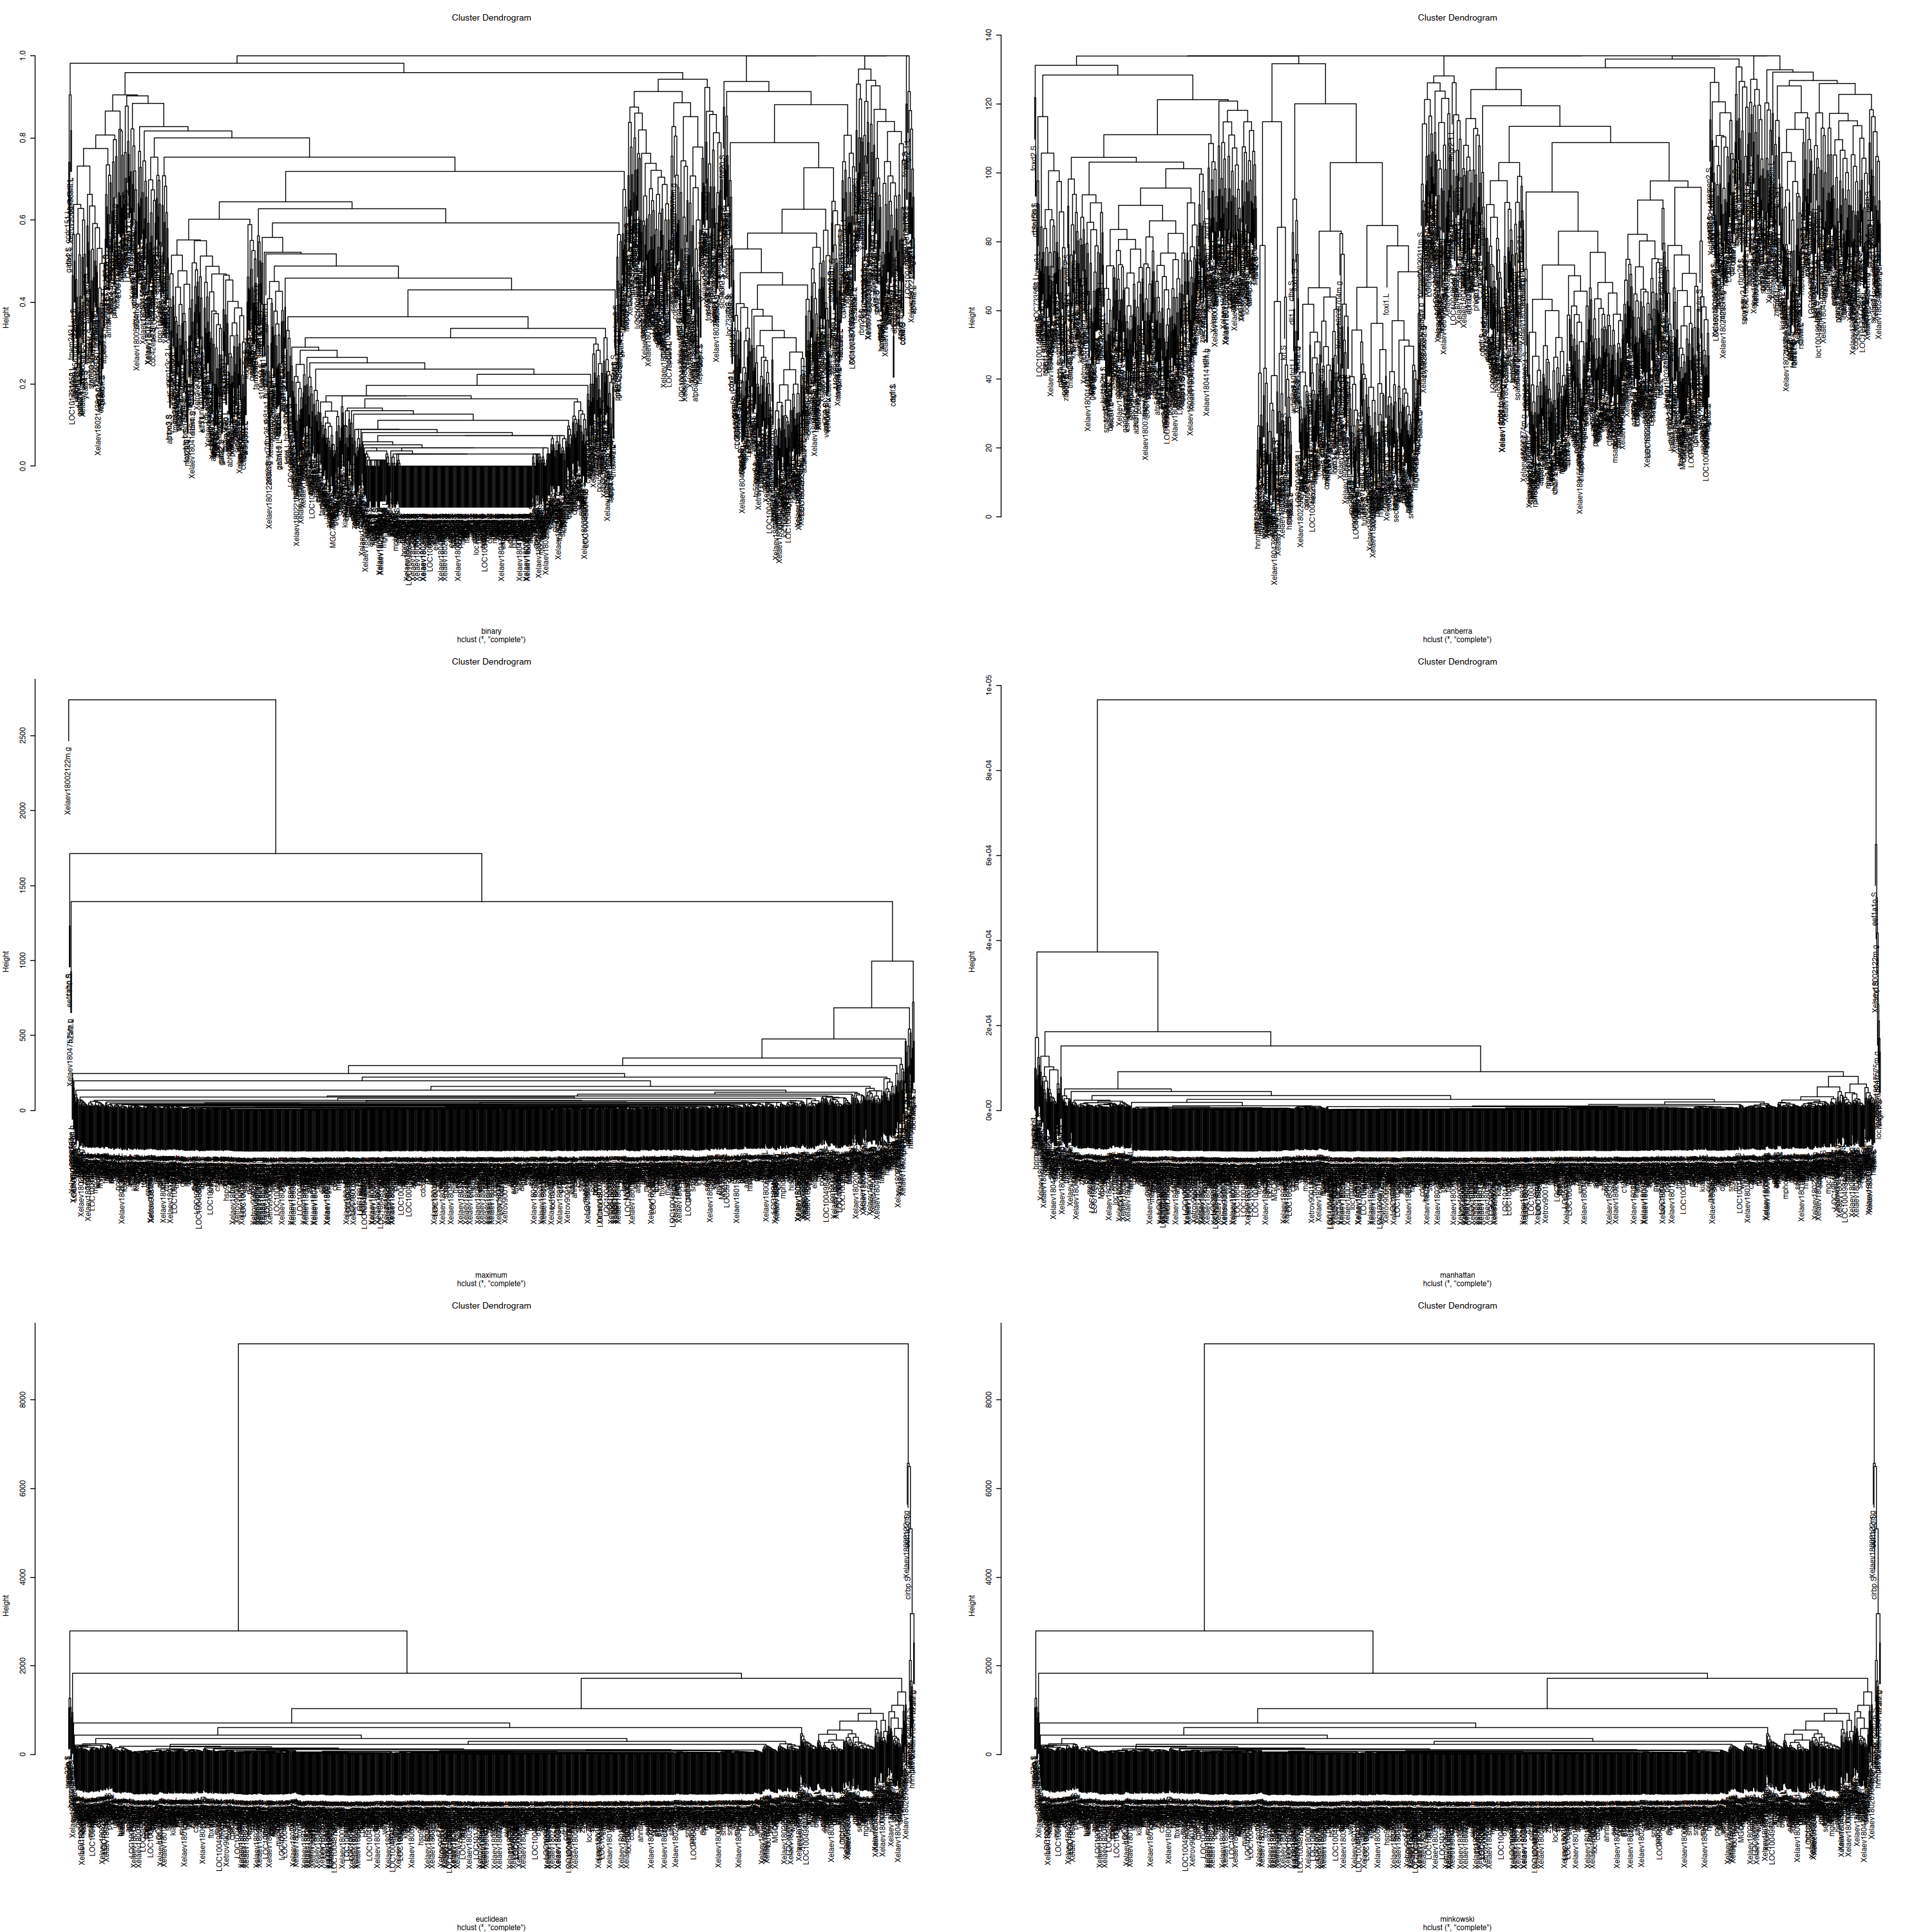

In [43]:
options(repr.plot.width = 30, repr.plot.height = 30, repr.plot.res = 100)


par(mfrow=c(3,2))
 
plot(hclust(bin), xlab="binary")
 
plot(hclust(can), xlab="canberra")
plot(hclust(max), xlab="maximum")
 
plot(hclust(man), xlab="manhattan")
plot(hclust(euc), xlab="euclidean")
 
plot(hclust(min), xlab="minkowski")

#single(單一）、complete（完整）、average（平均）、Ward’s（華德）和 centroid
       

In [44]:
library(factoextra)


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



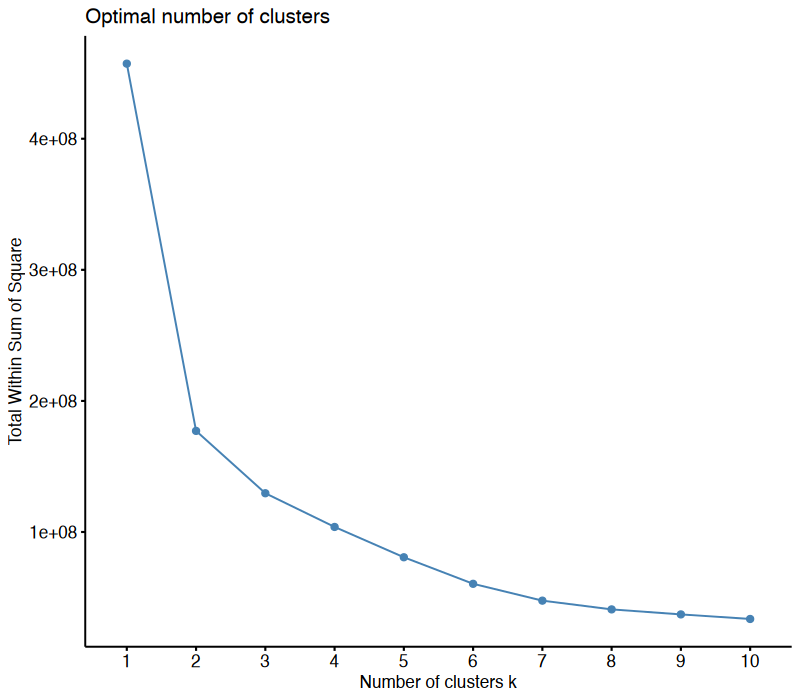

In [45]:
options(repr.plot.width=8, repr.plot.height=7)
fviz_nbclust(DE_genes_df, FUN = hcut, method = "wss")

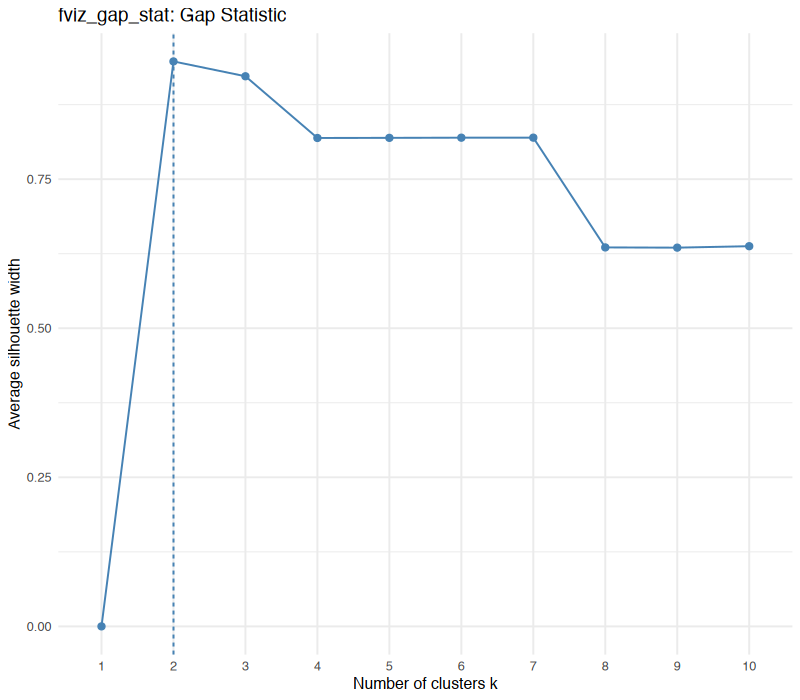

In [46]:
p1 <-fviz_nbclust(x = DE_genes_df,FUNcluster = hcut, method = "silhouette") + theme_minimal() + ggtitle("fviz_gap_stat: Gap Statistic")
p1

# try to find which end is close to which cluster

In [47]:
close_cluster_6_interested = umap_coordinate[umap_coordinate$UMAP_1 > -2 & umap_coordinate$UMAP_1 < 0 & umap_coordinate$UMAP_2 > -6 & umap_coordinate$UMAP_2 < -4,]

In [48]:
close_cluster_8_interested = umap_coordinate[umap_coordinate$UMAP_1 > 0 & umap_coordinate$UMAP_1 < 2 & umap_coordinate$UMAP_2 > -7.5 & umap_coordinate$UMAP_2 < -6,]

In [49]:
top_left <- df[df$DC1 < -0.15, ]
top_right <- df[df$DC1 > 0.075, ]
bottom <- df[df$DC2 < -0.1,]

In [50]:
for (a in 1:length(row.names(close_cluster_6_interested))) {
    for (b in 1:length(row.names(top_left))) {
        if (row.names(close_cluster_6_interested)[a] == row.names(top_left)[b]){
            print(paste(b,":",row.names(top_left)[b], " - found"))
            break
            }
        }
}
print(length(row.names(top_left)))

[1] "1 : AGAAGTAAGTACGTCT.1  - found"
[1] "3 : AGTTCCCAGGAGTACC.1  - found"
[1] "4 : ATGATCGCAAATGATG.1  - found"
[1] "5 : CCACGTTCACCCGTAG.1  - found"
[1] "6 : CCTCCTCGTGCTTATG.1  - found"
[1] "7 : TCGCTTGTCGGACGTC.1  - found"
[1] "8 : TCGTAGATCGCCACTT.1  - found"
[1] 8


In [51]:
for (a in 1:length(row.names(close_cluster_8_interested))) {
    for (b in 1:length(row.names(top_right))) {
        if (row.names(close_cluster_8_interested)[a] == row.names(top_right)[b]){
            print(paste(b,":",row.names(top_right)[b], " - found"))
            }
        }
}
print(length(row.names(top_right)))

[1] "4 : CTCCAACCACCTAAAC.1  - found"
[1] "7 : GCCAGCATCCGCCTAT.1  - found"
[1] "25 : TTAGGCAAGCAGGTCA.1  - found"
[1] 32


In [52]:
for (a in 1:length(row.names(close_cluster_8_interested))) {
    for (b in 1:length(row.names(bottom))) {
        if (row.names(close_cluster_8_interested)[a] == row.names(bottom)[b]){
            print(paste(b,":",row.names(bottom)[b], " - found"))
            }
        }
}
print(length(row.names(bottom)))

[1] 21


## A: top left of the diffusion map is close to cluster 6 in the umap and top right of the diffusion map is close to cluster 8 in the umap

In [53]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.3

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Berlin
tzcode source: internal

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] factoextra_1.0.7            patchwork_1.1.3            
 [3] fpc_2.2-10                  mcclust_1.0.1              
 [5] lpSolve_5.6.19              Rtsne_0.16                 
 [7] WGCNA_1.72-1                fastcluster_1.2.3          
 [9] dynamicTreeCut_1.63-1       scran_1.28.2               
[11] scuttle_1.10.3              gam_1.22-2                 
[13] forea